# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from api_key import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [28]:
count = 0
url = "http://api.openweathermap.org/data/2.5/weather?q="
units = "&units=imperial"
print("Beginning Data Retrieval")
print("-------------------------")
all_city_data = []
for x in cities:
    try:
        place = x
        data = {}
        address = f"{url}{place}{units}{api_key}"
        response = requests.get(address).json()
        name = response["name"]
        data['City Name'] = response["name"]
        data['Cloudiness'] = response['clouds']["all"]
        data['Country'] = response['sys']["country"]
        data['Date'] = response['dt']
        data['Humidity'] = response['main']["humidity"]
        data['Lat'] = response['coord']["lat"]
        data['Lng'] = response['coord']["lon"]
        data['Max Temp'] = response['main']["temp_max"]
        data['Wind Speed'] = response['wind']["speed"]
        count += 1
        all_city_data.append(data)
        print(f"Processing Record {count} | {name}")
    except:
        print("City not found. Skipping...")
print("-------------------------")    
print("Data Retreval complete")
print("-------------------------")


Beginning Data Retrieval
-------------------------
Processing Record 1 | Cherskiy
Processing Record 2 | Dikson
Processing Record 3 | Cape Town
Processing Record 4 | Ribeira Grande
Processing Record 5 | Vaini
Processing Record 6 | Benjamin Aceval
Processing Record 7 | Saint Anthony
Processing Record 8 | Barrow
Processing Record 9 | Avarua
Processing Record 10 | Kudahuvadhoo
City not found. Skipping...
Processing Record 11 | Mehamn
Processing Record 12 | Beringovskiy
Processing Record 13 | Rikitea
Processing Record 14 | Ushuaia
Processing Record 15 | Mataura
Processing Record 16 | Nikolskoye
Processing Record 17 | Porto Nacional
Processing Record 18 | Peniche
Processing Record 19 | Padang
Processing Record 20 | Mar del Plata
Processing Record 21 | Punta Arenas
Processing Record 22 | Provideniya
Processing Record 23 | Atasu
Processing Record 24 | Castro
City not found. Skipping...
Processing Record 25 | Najran
Processing Record 26 | Qaanaaq
Processing Record 27 | Butaritari
Processing Rec

Processing Record 224 | Yarada
Processing Record 225 | Fergus Falls
Processing Record 226 | Iqaluit
Processing Record 227 | Hermanus
Processing Record 228 | Dickinson
Processing Record 229 | Shu
Processing Record 230 | Bud
Processing Record 231 | Inhambane
Processing Record 232 | Porto Novo
Processing Record 233 | Camacha
Processing Record 234 | Hami
Processing Record 235 | Lamar
Processing Record 236 | Rocha
City not found. Skipping...
Processing Record 237 | Ales
City not found. Skipping...
Processing Record 238 | Gwadar
Processing Record 239 | Abnub
Processing Record 240 | Kawalu
Processing Record 241 | Pokhara
Processing Record 242 | Almeirim
City not found. Skipping...
Processing Record 243 | Naifaru
Processing Record 244 | Novo Aripuana
Processing Record 245 | Eureka
Processing Record 246 | Mangalia
Processing Record 247 | Berlevag
Processing Record 248 | Sao Filipe
Processing Record 249 | Muncar
Processing Record 250 | Georgetown
Processing Record 251 | Rapid Valley
Processing R

Processing Record 454 | Kurchatov
Processing Record 455 | Reims
Processing Record 456 | Beyneu
Processing Record 457 | Polunochnoye
Processing Record 458 | Gandai
Processing Record 459 | Teguldet
Processing Record 460 | Pitea
Processing Record 461 | Monrovia
Processing Record 462 | Amambai
Processing Record 463 | Remanso
Processing Record 464 | Anaconda
Processing Record 465 | Namatanai
Processing Record 466 | Saint Peter
Processing Record 467 | Lae
Processing Record 468 | Ambon
Processing Record 469 | Vardo
City not found. Skipping...
Processing Record 470 | Tuatapere
Processing Record 471 | Felanitx
Processing Record 472 | Chernyakhiv
Processing Record 473 | Novobiryusinskiy
Processing Record 474 | Kampot
Processing Record 475 | Karlivka
Processing Record 476 | Ayni
Processing Record 477 | Gorontalo
Processing Record 478 | Polonnaruwa
Processing Record 479 | Koster
Processing Record 480 | Nova Olinda do Norte
Processing Record 481 | Blyznyuky
Processing Record 482 | Mirnyy
City not f

In [44]:
raw_df = pd.DataFrame(all_city_data)
raw_df.head()

,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Cherskiy,76,RU,1536907595,59,68.75,161.30,45.20,2.57
1,Dikson,64,RU,1536907595,99,73.51,80.55,38.99,19.46
2,Cape Town,75,ZA,1536904800,93,-33.93,18.42,53.60,9.17
3,Ribeira Grande,75,PT,1536906600,83,38.52,-28.70,73.40,6.93
4,Vaini,8,IN,1536907596,82,15.34,74.49,80.66,3.69


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [37]:
raw_df.count()

City Name     563
Cloudiness    563
Country       563
Date          563
Humidity      563
Lat           563
Lng           563
Max Temp      563
Wind Speed    563
dtype: int64

In [38]:
raw_df.to_csv("weather_info.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

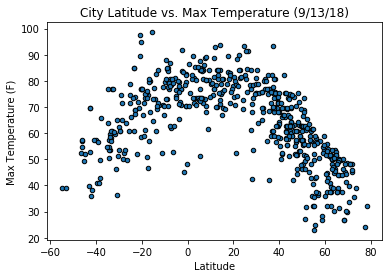

In [39]:
raw_df.plot(x="Lat",y="Max Temp",kind="scatter",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (9/13/18)")
plt.savefig("../images/max_temp_scatter")
plt.show()


#### Latitude vs. Humidity Plot

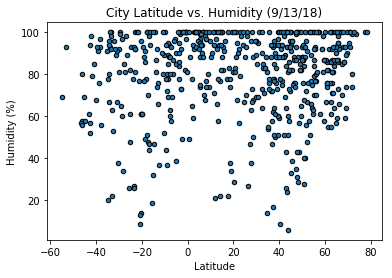

In [40]:
raw_df.plot(x="Lat",y="Humidity",kind="scatter",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (9/13/18)")
plt.savefig("../images/humidity_scatter")
plt.show()

#### Latitude vs. Cloudiness Plot

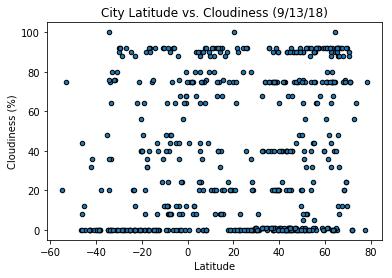

In [41]:
raw_df.plot(x="Lat",y="Cloudiness",kind="scatter",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (9/13/18)")
plt.savefig("../images/cloudiness_scatter")
plt.show()

#### Latitude vs. Wind Speed Plot

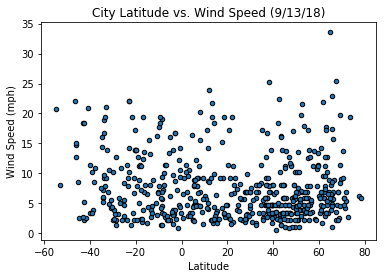

In [42]:
raw_df.plot(x="Lat",y="Wind Speed",kind="scatter",edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (9/13/18)")
plt.savefig("../images/wind_speed_scatter")
plt.show()